# Projekt: Kartografierung des Sonnensystems

In unserem Sonnensystem sind, Stand 17. August 2020, bereits 991,909 Asteroiden bekannt (Quelle: https://ssd.jpl.nasa.gov/?body_count). Ziel dieses Projekts ist es, zu untersuchen, ob sich mit den Methoden des Machine Learning die Kartografierung des Sonnensystems erleichtern lässt. Dazu untersuchen Sie, ob sich die Größe von Asteroiden anhand anderer Kenngrößen vorhersagen lässt. Betrachten Sie dazu den folgenden öffentlich verfügbaren Datensatz, der auf der Datenbank des Jet Propulsion Laboratory der NASA beruht: Asteroid Dataset (https://www.kaggle.com/basu369victor/prediction-of-asteroid-diameter).

Neben verschiedenen anderen Kenngrößen, mit denen Sie sich selbstständig vertraut machen sollen, enthält der Datensatz für jeden Asteroid eine Variable diameter, also den Durchmesser des Himmelskörpers, der die Zielvariable Ihres Vorhersagemodells sein soll. Ihre Aufgabe ist es, eine Exploration des Datensatzes vorzunehmen und anschließend mit einem geeigneten Modell die diameter-Variable vorherzusagen. Neben einem Modell sollen Sie auch eine Einschätzung der Generalisierungsfähigkeit des Modells bereitstellen, sowie einen Bericht ausarbeiten, der Ihr Vorgehen und ihre Entscheidungen dokumentiert.

## Aufgabenstellung 
1. Datenexploration: Explorieren Sie die Daten auf eine in Ihren Augen geeignete Weise. Folgende Aspekte könnten unter anderem dabei relevant sein:
    - Dateiformat(e), Anzahl der Datenpunkte und Messwerte
    - Art der Messwerte und Verteilungen der Messwerte
    - Missing Values
    - Korrelationen zwischen den Features und zwischen den Features und der Zielvariablen.
2. Datenrepräsentation: Repräsentieren Sie die Daten auf eine für Ihr Modell geeignete Weise. Untersuchen Sie, welche Vorverarbeitungen sinnvoll oder nötig sind.
3. Training: Trainieren Sie eines oder mehrere Modelle zur Vorhersage der Zielvariablen.
4. Evaluation: Evaluieren Sie das Modell und schätzen Sie die Generalisierungsfähigkeit des Modells.

## Vorgehensweise

1. Datenexploration:
    - 1.1 Import und Exploration der Daten. Ausgabe genereller Informationen des Datensatzes(Shape, Spaltennamen, Anzahl der Datenpunkte etc.)
    - 1.2 Prüfung auf Missing Values und Bereinigung der Daten: alle Datenpunkte, die keine Angabe zu der Zielvariable haben, werden ausgeschlossen. Alle Spalten, die weniger als zu 50% befüllt sind, werden ausgeschlossen.
    - 1.3 Analyse der Korrelationen zwischen Features untereinander sowie zu der Zielvariablen
    
    
2. Datenrepräsentation bzw. Preprocessing
    - 2.1 Trainings- und Testdatensatz splitten 
    - 2.2 Transformation der Zielvariablen
    - 2.3 Imputation
        - 2.3.1 Kategorische und numerische Features bestimmen und voneinander trennen
        - 2.3.2 Imputationen für Trainings- und Testdaten durchführen
        - 2.3.3 Encoding (für kategorische Features)
        - 2.3.4 Standardisierung
        - 2.3.5 Concatenation
        
        
3. Training von Machine Learning Modellen
    - 3.1 Baseline Model: Lineare Regression 
    - 3.2 L1 Regularisierung
    - 3.3 Gradient Boosting
    - 3.4 L2 Regularisierung
    - 3.5 Hyperparameter Tuning: L2
    - 3.6 KNN Regression
    
4. Evaluation
    - 4.1 Maßstab für Generalisierungsfähigkeit: Scoring anhand der Testdaten
    - 4.2 Vorhersage der fehlenden Zielvariablen
        - 4.2.2 Preprocessing
        - 4.2.3 Vorhersage
  

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## 1. Datenexploration: Datenimport und erste Analyse

### 1.1 Dateiformat(e), Anzahl der Datenpunkte und Messwerte

<b>Datensatz importieren: Der Asteroids_Updated hat mehr Features als der Asteroid Datensatz, daher verwenden wir hier den Asteroids_Updated.</b>

In [2]:
#txtfile = "/Users/Leila/Downloads/ML/Projekt2_Asteroids/archive/Asteroid_Updated.csv"
txtfile = "/Users/Marjan/Desktop/Projekt2_Leila_Marjan/Asteroid_Updated.csv"
df = pd.read_csv(txtfile, delimiter=',',low_memory=False)
df.shape    #Wie sieht der Datensatz aus?

(839714, 31)

In [3]:
df.info() # Grundlegende Informationen zum Datensatz ausgeben

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 839714 entries, 0 to 839713
Data columns (total 31 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   name            21967 non-null   object 
 1   a               839712 non-null  float64
 2   e               839714 non-null  float64
 3   i               839714 non-null  float64
 4   om              839714 non-null  float64
 5   w               839714 non-null  float64
 6   q               839714 non-null  float64
 7   ad              839708 non-null  float64
 8   per_y           839713 non-null  float64
 9   data_arc        824240 non-null  float64
 10  condition_code  838847 non-null  object 
 11  n_obs_used      839714 non-null  int64  
 12  H               837025 non-null  float64
 13  neo             839708 non-null  object 
 14  pha             823272 non-null  object 
 15  diameter        137636 non-null  object 
 16  extent          18 non-null      object 
 17  albedo    

<b>Exploration : Ausgabe der ersten fünf Zeilen<b>

In [4]:
df.head()

name         a         e          i          om           w         q  \
0    Ceres  2.769165  0.076009  10.594067   80.305532   73.597694  2.558684   
1   Pallas  2.772466  0.230337  34.836234  173.080063  310.048857  2.133865   
2     Juno  2.669150  0.256942  12.988919  169.852760  248.138626  1.983332   
3    Vesta  2.361418  0.088721   7.141771  103.810804  150.728541  2.151909   
4  Astraea  2.574249  0.191095   5.366988  141.576605  358.687607  2.082324   

         ad     per_y  data_arc  ...     UB  IR  spec_B spec_T     G     moid  \
0  2.979647  4.608202    8822.0  ...  0.426 NaN       C      G  0.12  1.59478   
1  3.411067  4.616444   72318.0  ...  0.284 NaN       B      B  0.11  1.23324   
2  3.354967  4.360814   72684.0  ...  0.433 NaN      Sk      S  0.32  1.03454   
3  2.570926  3.628837   24288.0  ...  0.492 NaN       V      V  0.32  1.13948   
4  3.066174  4.130323   63507.0  ...  0.411 NaN       S      S   NaN  1.09589   

  class         n          per          ma  
0   MBA  0.213885  1683.145708   77.372096  
1   MBA  0.213503  1686.155999   59.699133  
2   MBA  0.226019  1592.787285   34.925016  
3   MBA  0.271609  1325.432765   95.861936  
4   MBA  0.238632  1508.600458  282.366289  

[5 rows x 31 columns]

<b>Exploration : Ausgabe der Spaltennamen</b>

In [5]:
df.columns

Index(['name', 'a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc',
       'condition_code', 'n_obs_used', 'H', 'neo', 'pha', 'diameter', 'extent',
       'albedo', 'rot_per', 'GM', 'BV', 'UB', 'IR', 'spec_B', 'spec_T', 'G',
       'moid', 'class', 'n', 'per', 'ma'],
      dtype='object')

<b>Exploration : Ausgabe der Datentypen der einzelnen Spalten</b>

In [6]:
df.dtypes

name               object
a                 float64
e                 float64
i                 float64
om                float64
w                 float64
q                 float64
ad                float64
per_y             float64
data_arc          float64
condition_code     object
n_obs_used          int64
H                 float64
neo                object
pha                object
diameter           object
extent             object
albedo            float64
rot_per           float64
GM                float64
BV                float64
UB                float64
IR                float64
spec_B             object
spec_T             object
G                 float64
moid              float64
class              object
n                 float64
per               float64
ma                float64
dtype: object

### 1.2 Prüfen auf Missing Values

In [7]:
np.sum(df.isnull())

name              817747
a                      2
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     6
per_y                  1
data_arc           15474
condition_code       867
n_obs_used             0
H                   2689
neo                    6
pha                16442
diameter          702078
extent            839696
albedo            703305
rot_per           820918
GM                839700
BV                838693
UB                838735
IR                839713
spec_B            838048
spec_T            838734
G                 839595
moid               16442
class                  0
n                      2
per                    6
ma                     8
dtype: int64

<b>Alle Datenpunkte, die keine Angabe zu der Zielvariable diameter haben, werden ausgeschlossen</b>

In [8]:
df['diameter']=pd.to_numeric(df['diameter'],errors='coerce') #Die Spalte diameter ist vom Typ object

dropped_df = df.loc[(df['diameter'][df['diameter'].isnull()].index )]#Leere diameter für spätere analysen speichern                                                          # wir transformieren sie zu einer numerischen Variable

df= df.drop((df['diameter'][df['diameter'].isnull()].index), axis=0) #alle Zeilen ohne Inhalt aus dem DF entfernen
np.sum(df.isnull())

name              122512
a                      0
e                      0
i                      0
om                     0
w                      0
q                      0
ad                     0
per_y                  0
data_arc             138
condition_code         0
n_obs_used             0
H                    747
neo                    0
pha                    0
diameter               0
extent            137620
albedo              1230
rot_per           126448
GM                137622
BV                136631
UB                136671
IR                137634
spec_B            136266
spec_T            136671
G                 137517
moid                   0
class                  0
n                      0
per                    0
ma                     0
dtype: int64

<b>Verteilung der Messwerte checken </b>
(Wir haben uns die Verteilung erst nach der Bereinigung der Messdaten ausgegeben, weil die Verarbeitung ansonsten sehr lange dauert)


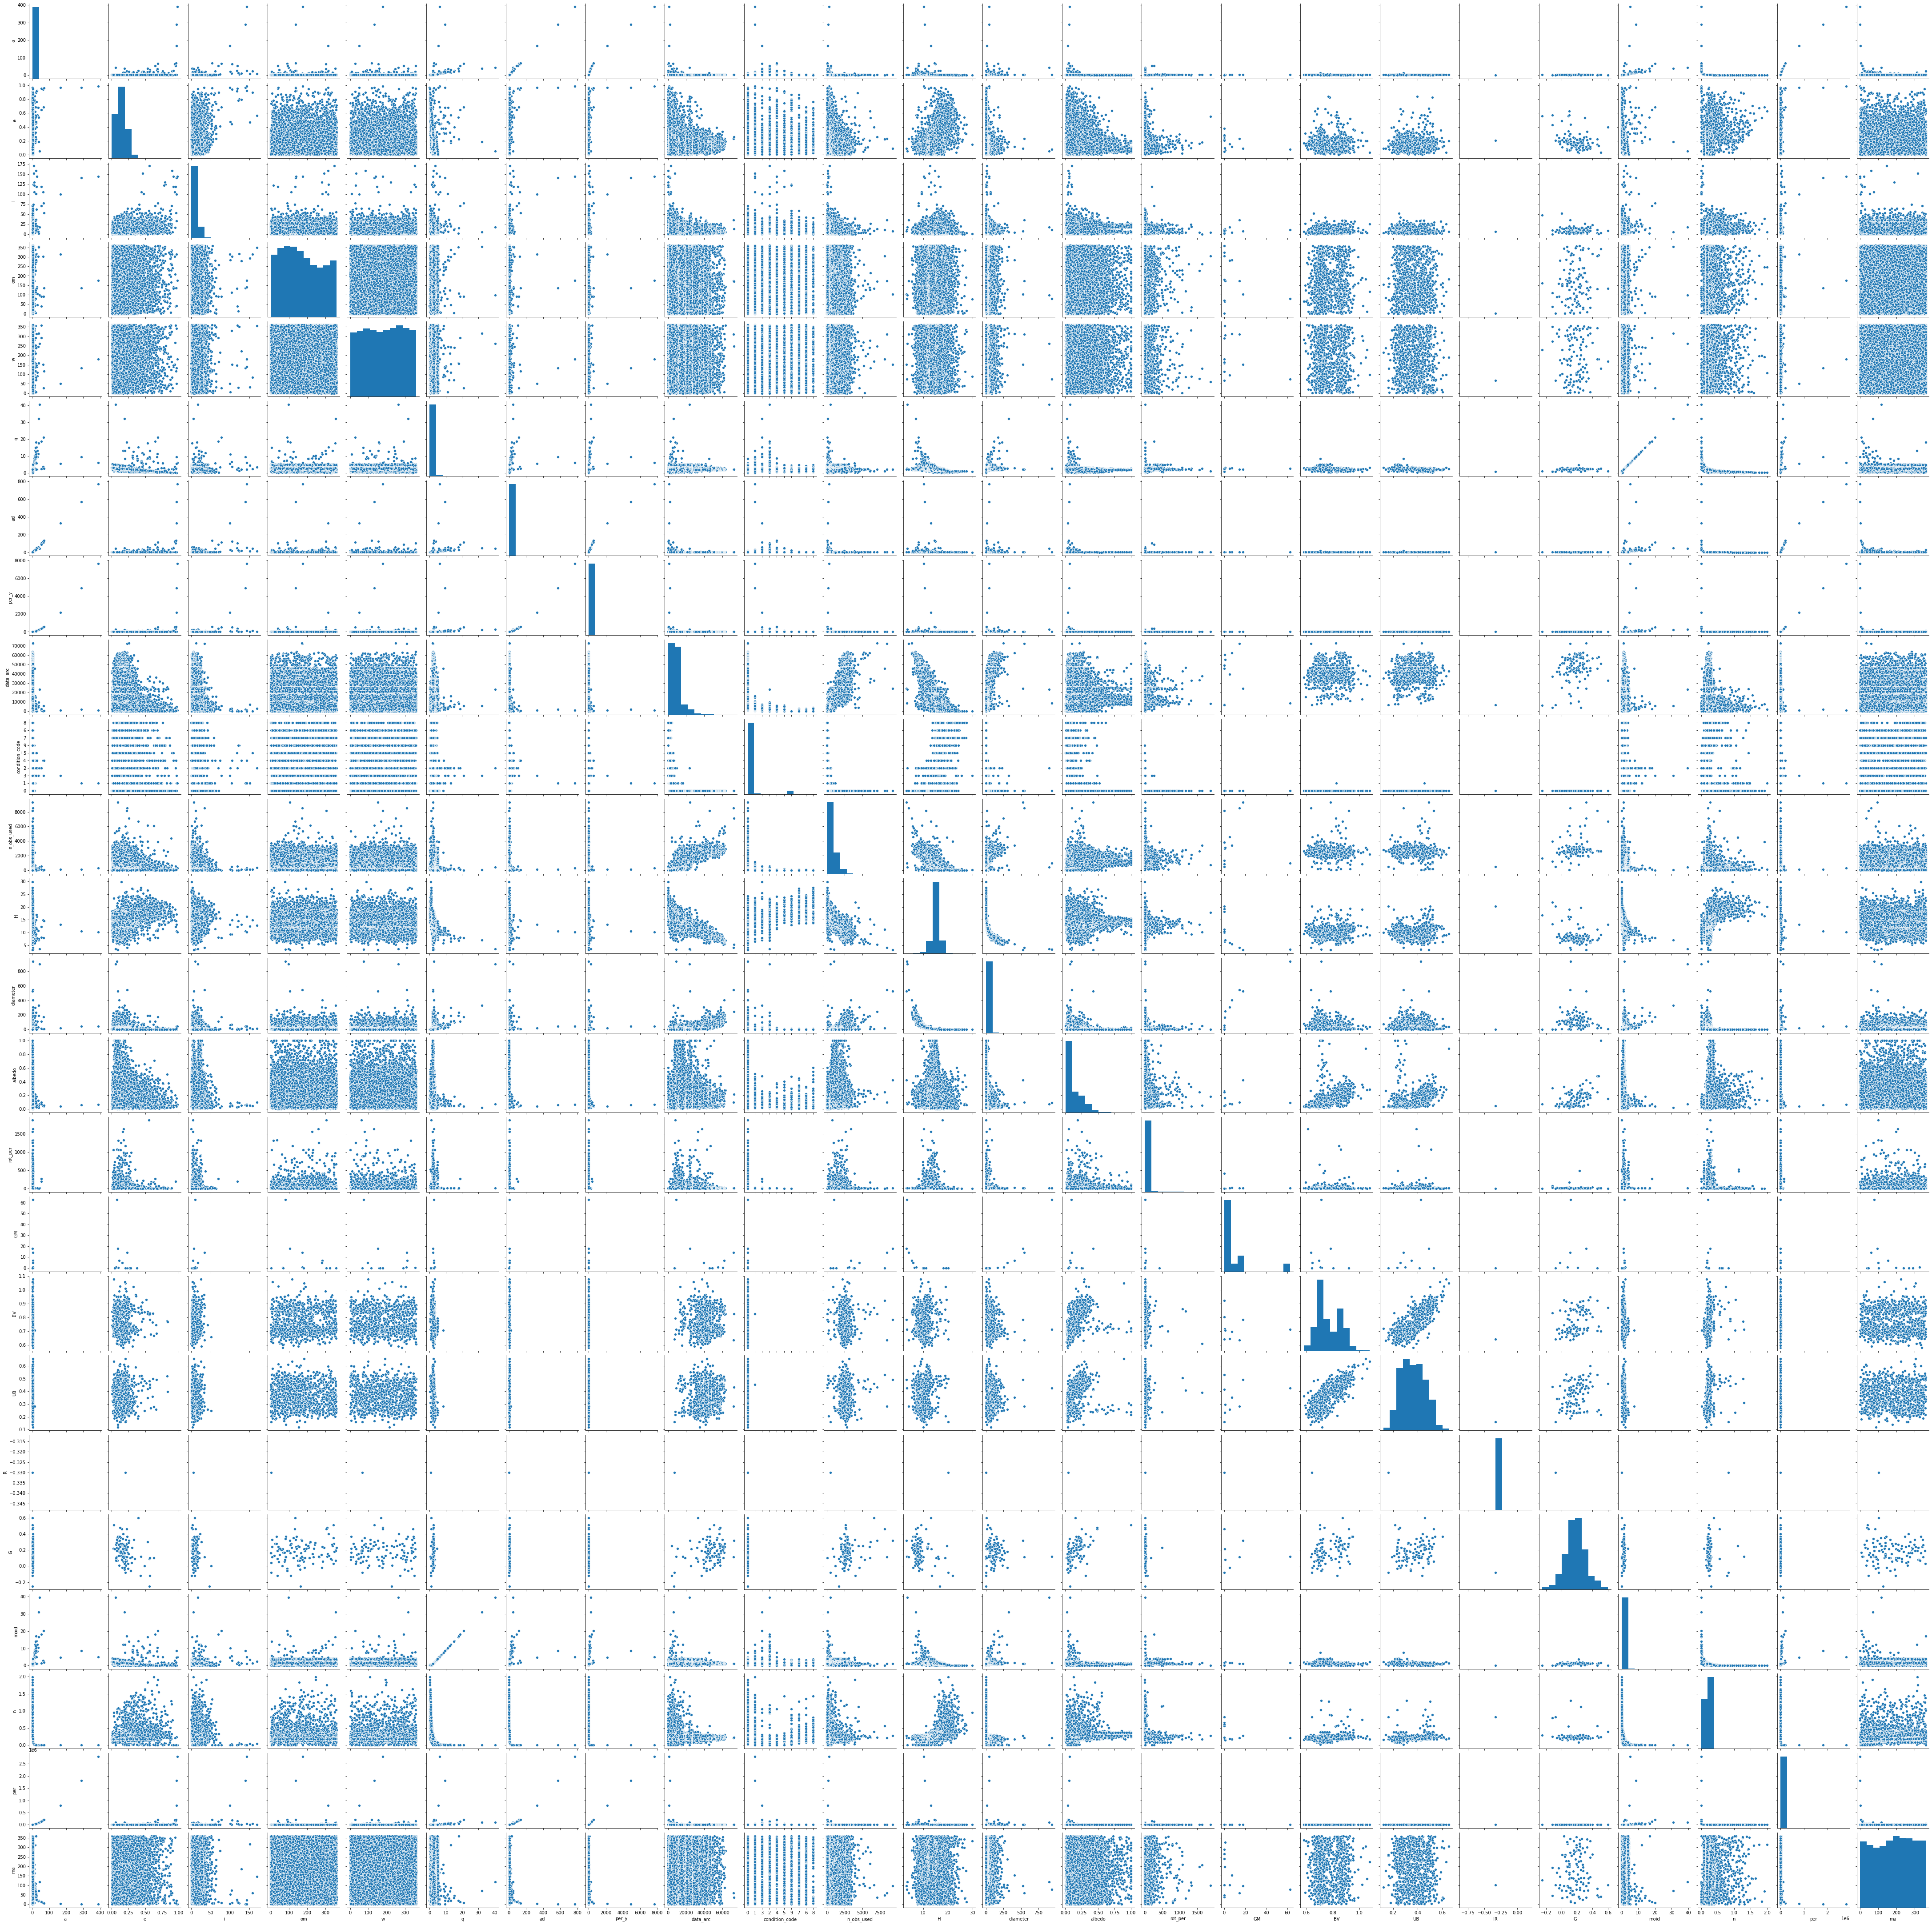

In [9]:
sns.pairplot(df)

<b>Beschreibung der Zielvariablen nach der ersten Bereinigung</b>

In [10]:
df['diameter'].describe() 

count    137635.000000
mean          5.481626
std           9.366928
min           0.002500
25%           2.770000
50%           3.956000
75%           5.741500
max         939.400000
Name: diameter, dtype: float64

<b>Duplikate entfernen</b>

In [11]:
df.drop_duplicates(keep=False, inplace=True)
df.shape

(137635, 31)

<b>Entfernen aller Spalten, die über die Hälfte leer sind</b>

In [12]:
clmns_to_drop = df.columns[df.isnull().sum()/df.shape[0] > 0.5]
df = df.drop(clmns_to_drop,axis=1)
df.shape

(137635, 21)

### 1.3 Korrelation

<b>Korrelationsanalyse mittels Heatmap : Alle Features zueinander</b>

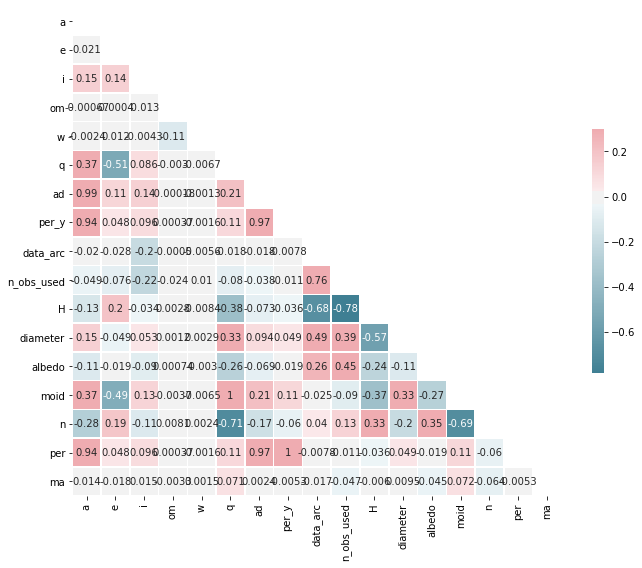

In [13]:
corr = df.corr()
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,annot = True,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})
plt.show()

<b>Korrelationsanalyse aller Features auf die Zielvariable</b>

In [14]:
df.corr()['diameter'].abs().sort_values(ascending=False)

diameter      1.000000
H             0.568759
data_arc      0.492484
n_obs_used    0.386050
moid          0.333053
q             0.330323
n             0.201360
a             0.145015
albedo        0.107598
ad            0.093613
i             0.052897
e             0.049206
per           0.049050
per_y         0.049050
ma            0.009504
w             0.002894
om            0.001199
Name: diameter, dtype: float64

<b>Visualisierung der Verteilungen von allen Features zur Zielvariable</b>

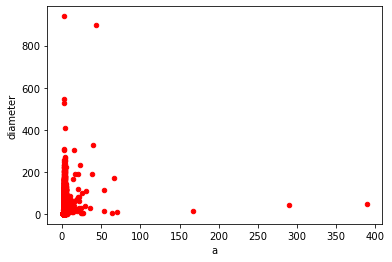

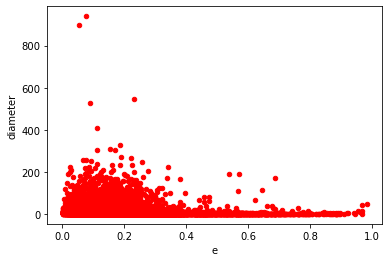

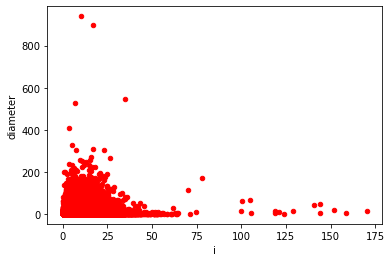

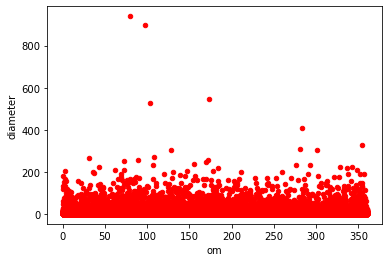

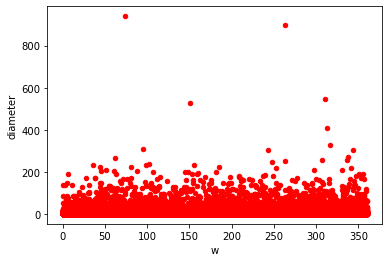

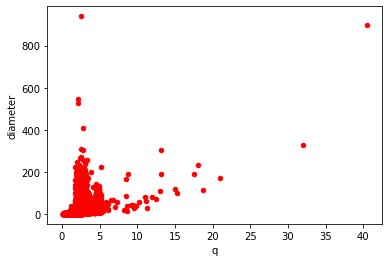

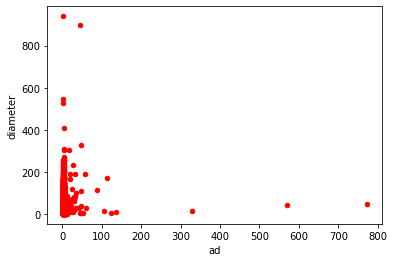

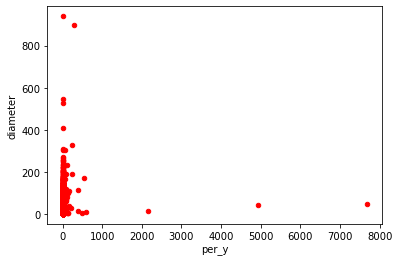

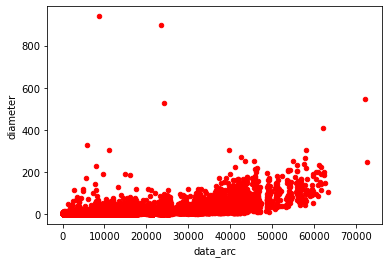

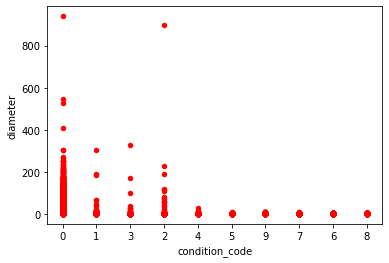

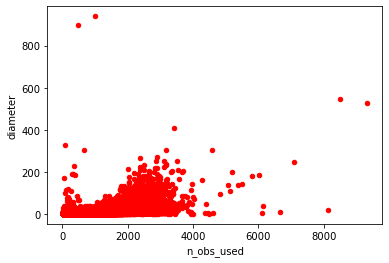

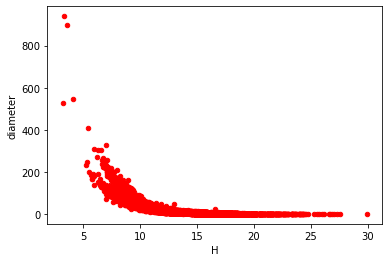

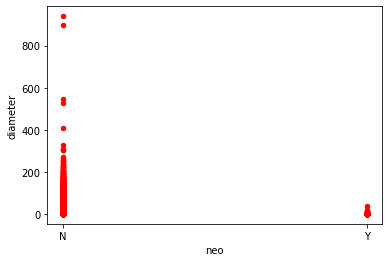

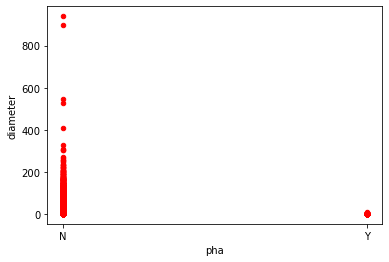

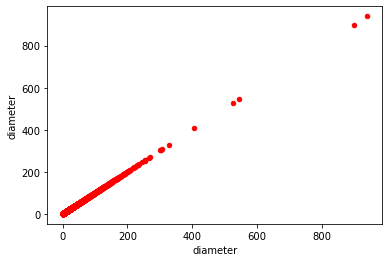

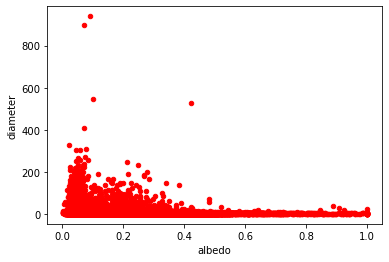

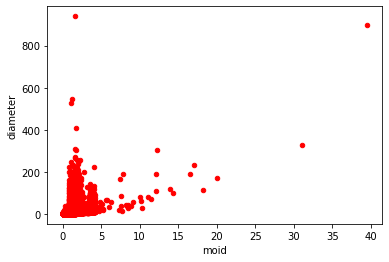

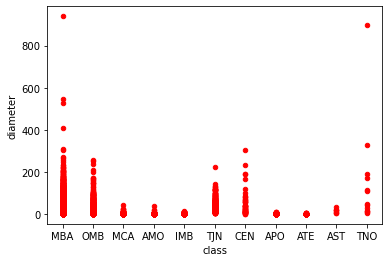

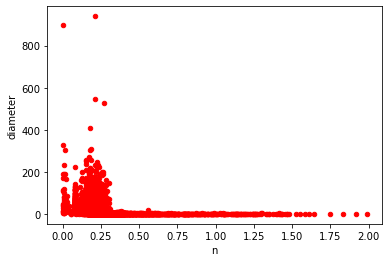

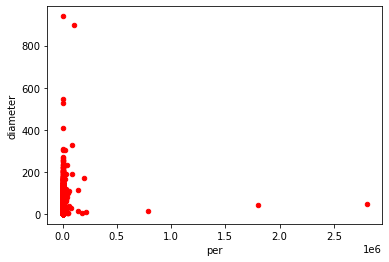

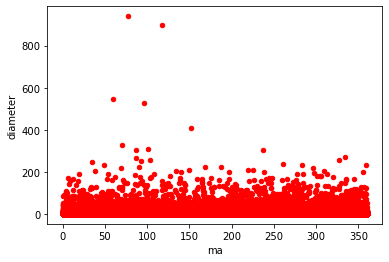

In [15]:
features_df= df.columns
for iter in features_df:
    df.plot(kind='scatter',x=iter,y='diameter',color='red')
    plt.show()

## 2. Preprocessing

### 2.1 Trainings und Testdatensatz splitten

In [16]:
from sklearn.model_selection import train_test_split
y = df.diameter
y_trans = np.log1p(y)

X = df.drop(columns="diameter", axis=1)
X_train, X_test, y_train, y_test = train_test_split(X, y_trans, test_size=0.20, random_state=42) #stratify benötigen wir in diesem fall nicht, da y nur eine gruppe hat

X_train

a         e          i          om           w         q  \
88139   3.126769  0.101765  14.228075   93.358911   74.972094  2.808575   
79464   3.055414  0.063046   8.290894  110.241255  344.629027  2.862783   
19339   2.791924  0.056713   7.564778  132.502334   84.163235  2.633586   
245827  2.570732  0.273668  21.136131   97.052212  196.541480  1.867204   
145375  3.053026  0.210413  23.071751  247.122302   34.986811  2.410630   
...          ...       ...        ...         ...         ...       ...   
328334  2.567478  0.291255  12.880482  144.142242  220.516893  1.819688   
425954  3.179069  0.110020  19.661417  116.033699  180.687068  2.829308   
271356  3.181002  0.188522  14.605320   92.591941  282.414536  2.581314   
629522  2.479833  0.117464  29.493151  141.932309    5.607429  2.188541   
449898  2.911285  0.233400   7.790091  310.241608  293.547333  2.231792   

              ad     per_y  data_arc condition_code  n_obs_used     H neo pha  \
88139   3.444963  5.529068    6793.0              0        1128  13.6   N   N   
79464   3.248045  5.340886    9981.0              0         517  14.8   N   N   
19339   2.950262  4.665128    8395.0              0        1758  13.3   N   N   
245827  3.274259  4.121861    4487.0              0         716  15.0   N   N   
145375  3.695422  5.334626    6772.0              0         377  14.2   N   N   
...          ...       ...       ...            ...         ...   ...  ..  ..   
328334  3.315268  4.114038    3965.0              0         464  15.8   N   N   
425954  3.528830  5.668369    7602.0              0          91  15.8   N   N   
271356  3.780690  5.673540    6192.0              0         349  15.0   N   N   
629522  2.771125  3.905187       1.0              9          16  18.1   N   N   
449898  3.590778  4.967470    9149.0              0         108  16.6   N   N   

        albedo      moid class         n          per          ma  
88139    0.061  1.859230   MBA  0.178263  2019.492156   13.259254  
79464    0.078  1.880650   MBA  0.184544  1950.758685   12.614732  
19339    0.042  1.640330   MBA  0.211275  1703.938081  195.537372  
245827   0.111  0.857142   MBA  0.239122  1505.509564   38.700697  
145375   0.082  1.423820   MBA  0.184760  1948.472160  199.477123  
...        ...       ...   ...       ...          ...         ...  
328334   0.055  0.834668   MBA  0.239576  1502.652326  145.569371  
425954   0.095  1.812690   MBA  0.173882  2070.371898   97.443209  
271356   0.050  1.631470   MBA  0.173723  2072.260415  302.500752  
629522   0.046  1.201090   MBA  0.252389  1426.369619   26.343223  
449898   0.017  1.232360   MBA  0.198416  1814.368563  310.283735  

[110108 rows x 20 columns]

### 2.2 Transformation der Zielvariablen

<b>Aufgrund der hohen Variation der Größe der Datenpunkte empfhielt sich die logarithmische Transformation der Datenpunkte. Dies ist im folgenden Diagramm gut zu entnehmen.</b>

Text(0.5, 1.0, 'Transformierte Zielvariable (log)')

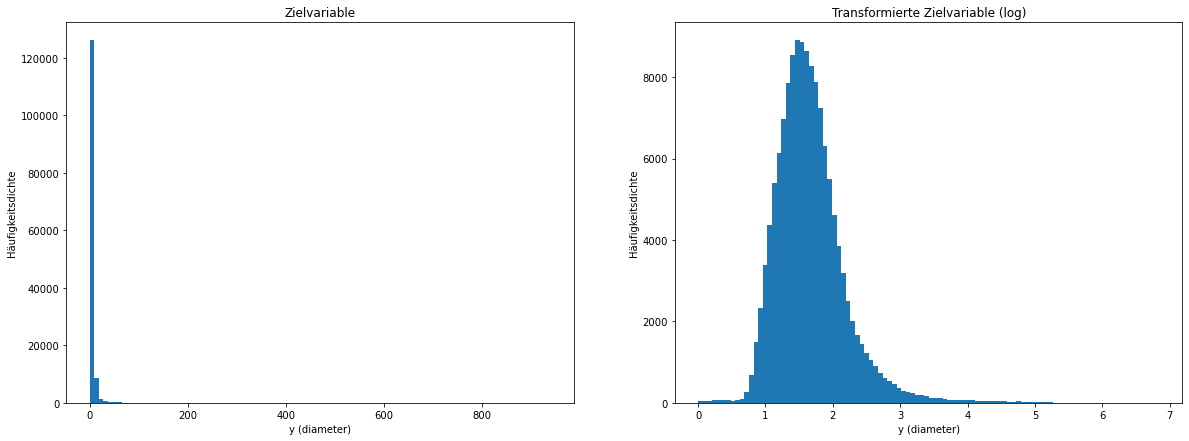

In [17]:
y_trans = np.log1p(y)

f, (ax0, ax1) = plt.subplots(1, 2,figsize=(20,7))

ax0.hist(y, bins=100)
ax0.set_ylabel('Häufigkeitsdichte')
ax0.set_xlabel('y (diameter)')
ax0.set_title('Zielvariable')

ax1.hist(y_trans, bins=100)
ax1.set_ylabel('Häufigkeitsdichte')
ax1.set_xlabel('y (diameter)')
ax1.set_title('Transformierte Zielvariable (log)')


## 2.3 Imputation

### 2.3.1 Kategorische und numerische Features bestimmen und voneinander trennen

<b>Für eine sinnvolle Imputation der Missing Values müssen wir kategorische und numerische Features unterscheiden.</b>

In [18]:
categ_columns = ['condition_code', 'neo', 'pha', 'class']
continuous_columns=df.select_dtypes(include=np.number).columns.tolist()

#Transformieren der Daten in den kategorischen Spalten zum kategorischen Datentyp
X_train.loc[:, categ_columns] =df.loc[:, categ_columns].astype("category")
X_test.loc[:, categ_columns] =df.loc[:, categ_columns].astype("category")
#Ab dieser Stelle müssen alle Preprocessing-Schritte sowohl für den Trainings- als auch für den Testdatensatz 
#durchgeführt werden.

D:\Anaconda3\lib\site-packages\pandas\core\indexing.py:966: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


<b>Nominale Kategorien aus den kategorischen Features werden aus den Daten in Listen geschrieben</b>

In [19]:
nominal_categories_train = [
    list(X_train[column].values.categories) for column in categ_columns
]
nominal_categories_test = [
    list(X_test[column].values.categories) for column in categ_columns
]

### 2.3.2 Imputationen für Trainings- und Testdaten durchführen

<b>Für kategorische Features nutzen wir die am häufigsten auftretende Kategorie für die Imputation (most_frequent), bei den numerischen Features nutzen wir den Mittelwert (mean).</b>

In [20]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

continuous_imputer = SimpleImputer(strategy='mean')
category_imputer= SimpleImputer(strategy='most_frequent') 


#1. Trainingsdaten imputen
X_train_contin=X_train.reindex(columns = continuous_columns)
X_train_categ= X_train.loc[:,categ_columns]

#2. Testdaten imputen
X_test_contin=X_test.reindex(columns = continuous_columns)
X_test_categ= X_test.loc[:,categ_columns]

#3. Imputer fitting für Trainingsdaten
continuous_imputer.fit(X_train_contin)
category_imputer.fit(X_train_categ)

#4. Transformation der Trainingsdaten: Missing Values werden entsprechend gefüllt 
X_train_continuous_imputed=continuous_imputer.transform(X_train_contin)
X_train_category_imputed=category_imputer.transform(X_train_categ)


#5. Transformation der Testdaten: Missing Values werden entsprechend gefüllt 
X_test_continuous_imputed=continuous_imputer.transform(X_test_contin)
X_test_category_imputed=category_imputer.transform(X_test_categ)




<b>Letzte Prüfung auf Missing Values</b>

In [21]:
pd.DataFrame(X_train_category_imputed).isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [22]:
pd.DataFrame(X_test_category_imputed).isna().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [23]:
X_train_contin.columns

Index(['a', 'e', 'i', 'om', 'w', 'q', 'ad', 'per_y', 'data_arc', 'n_obs_used',
       'H', 'diameter', 'albedo', 'moid', 'n', 'per', 'ma'],
      dtype='object')

In [24]:
X_train_categ.columns

Index(['condition_code', 'neo', 'pha', 'class'], dtype='object')

In [25]:
pd.DataFrame(X_train_continuous_imputed).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

In [26]:
pd.DataFrame(X_test_continuous_imputed).isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
13    0
14    0
15    0
dtype: int64

### 2.3.3 Encoding

<b>Die imputierten kategorischen Features werden mittels eines Encoders in numerische Werte transformiert</b>

In [27]:
#Trainingsdaten encoden
cat_encoder = OneHotEncoder(categories=nominal_categories_train,sparse=False)
cat_encoder.fit(X_train_category_imputed)

X_train_category_imputed_encoded = cat_encoder.transform(X_train_category_imputed)
X_train_category_imputed_encoded.shape

(110108, 25)

In [28]:
#Testdaten encoden
X_test_category_imputed_encoded = cat_encoder.transform(X_test_category_imputed)

X_test_category_imputed_encoded.shape

(27527, 25)

### 2.3.4 Standardisierung 

<b>Standardisierung für die kontinuierlichen Daten</b>

In [29]:
scaler = StandardScaler()
#1. Standardisierung der Trainingsdaten
scaler.fit(X_train_continuous_imputed)
X_train_continuous_imputed_scaled = scaler.transform(X_train_continuous_imputed)

In [30]:
#2. Standardisierung der Testdaten
X_test_continuous_imputed_scaled = scaler.transform(X_test_continuous_imputed)

In [31]:
X_test_continuous_imputed_scaled.shape

(27527, 16)

### 2.3.5 Concatenation

<b> Die kategorischen und numerischen Daten werden nach der Imputation, nach dem Encoding und der Standardisierung wieder zu einem Test- bzw. Trainingssatz zusammengefasst.</b>

In [32]:
#Concatenation Trainingsdaten 
X_train_preprocessed = np.concatenate((
    X_train_category_imputed_encoded,
    X_train_continuous_imputed_scaled
), axis=1)

#Concatenation Testdaten 
X_test_preprocessed = np.concatenate((
    X_test_category_imputed_encoded,
    X_test_continuous_imputed_scaled
), axis=1)



In [33]:
X_train_preprocessed.shape

(110108, 41)

## 3. Training von Machine Learning Modellen

<b>Für den Vergleich der verwendeten Modelle schreiben wir die Modellnamen und das entsprechende Scoring in Listen</b>

In [34]:
modelle=[]
scorings=[]

### 3.1 Baseline Model: Lineare Regression

In [35]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso
#Modell wählen
baseline_model = LinearRegression()

#Model fitten
baseline_model.fit(X_train_preprocessed, y_train)

LinearRegression()

<b>Scoring der Trainingsdaten - r²</b>

In [36]:
baseline_model.score(X_train_preprocessed, y_train)

0.9300162481125692

In [37]:
modelle.append('LinReg')
scorings.append(baseline_model.score(X_train_preprocessed, y_train))

### 3.2 L1 Regularisierung 

In [38]:
#Modell Lasso wählen und fitten
reg = Lasso(alpha=0.1) 

reg.fit(X_train_preprocessed, y_train)

Lasso(alpha=0.1)

<b>Scoring der Trainingsdaten - r²</b>

In [39]:
reg.score(X_train_preprocessed, y_train)

0.8186276332474796

In [40]:
modelle.append('L1 Reg')
scorings.append(reg.score(X_train_preprocessed, y_train))

<b> Koeffizienten der Regularisierung prüfen </b>

In [41]:
erg=np.nonzero(reg.coef_)

In [42]:
erg[0]

array([35, 36], dtype=int64)

Die Elemente 35 und 36 entsprechen den Features 'n_obs_used' und 'H'

### 3.3 Gradient Boosting

In [43]:
from sklearn.ensemble import GradientBoostingRegressor

#Modell boosting wählen und fitten
boosting = GradientBoostingRegressor(n_estimators=100)
boosting.fit(X_train_preprocessed, y_train)

GradientBoostingRegressor()

<b>Scoring der Trainingsdaten - r²</b>

In [44]:
boosting.score(X_train_preprocessed, y_train)

0.9709890368773009

In [45]:
modelle.append('GradBoosting')
scorings.append(boosting.score(X_train_preprocessed, y_train))

<b> Visualisierung des Gradient Boosting </b>

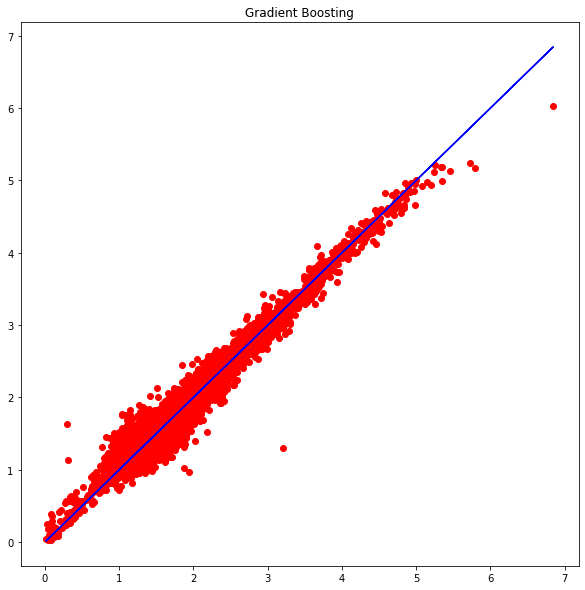

In [46]:
y_pred=boosting.predict(X_test_preprocessed)
plt.figure(figsize=(10,10))
plt.plot(y_test, y_test, color = 'blue')                
plt.scatter(y_test, y_pred, color = 'red')   
plt.title("Gradient Boosting")
plt.show()
 

## 3.4 L2 Regularisierung

In [47]:
reg2 = Ridge(alpha=1.0)
reg2.fit(X_train_preprocessed, y_train)

Ridge()

<b>Scoring der Trainingsdaten - r²</b>

In [48]:
reg2.score(X_train_preprocessed, y_train)

0.929983015273746

In [49]:
modelle.append("L2 Reg")
scorings.append(reg2.score(X_train_preprocessed, y_train))

## 3.5 Hyperparameter Tuning : L2

In [50]:
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import make_pipeline

param_grid = {"alpha": [1e-4, 1e-3, 1e-2, 1.0, 10.0, 100.0]}

reg2_tuned = GridSearchCV(
    reg2,
    param_grid=param_grid,
    cv=5
)

reg2_tuned.fit(X_train_preprocessed, y_train)

GridSearchCV(cv=5, estimator=Ridge(),
             param_grid={'alpha': [0.0001, 0.001, 0.01, 1.0, 10.0, 100.0]})

<b>Scoring der Trainingsdaten - r²</b>

In [51]:
reg2_tuned.score(X_train_preprocessed, y_train)

0.9297297242277243

In [52]:
modelle.append("L2_reg_tuned")
scorings.append(reg2_tuned.score(X_train_preprocessed, y_train))

## 3.6 KNN Regression

In [53]:
from sklearn.neighbors import KNeighborsRegressor

neigh = KNeighborsRegressor(n_neighbors=3)

### Training
neigh.fit(X_train_preprocessed,y_train)
x=neigh.score(X_train_preprocessed,y_train) #Lange Trainingszeit


<b>Scoring der Trainingsdaten - r²</b>

In [54]:
#scorings in die Tabelle schreiben
modelle.append("KNN Reg")
scorings.append(x)

## 4. Evaluation

### <b>4.1 Evaluation der Modell Performance, Gütemaß: R²</b>

In [55]:
#Zum Vergleich der Generalisierbarkeit der einzelnen Modelle schreiben wir auch die Scorings der Testdaten in Listen
modelle_eval=[]
scorings_eval=[]

<b>4.1.1 Baseline Model: Lineare Regression</b>

In [56]:
#scoring
modelle_eval.append("Lin Reg")
scorings_eval.append(baseline_model.score(X_test_preprocessed, y_test))

baseline_model.score(X_test_preprocessed, y_test)

0.9294508187802968

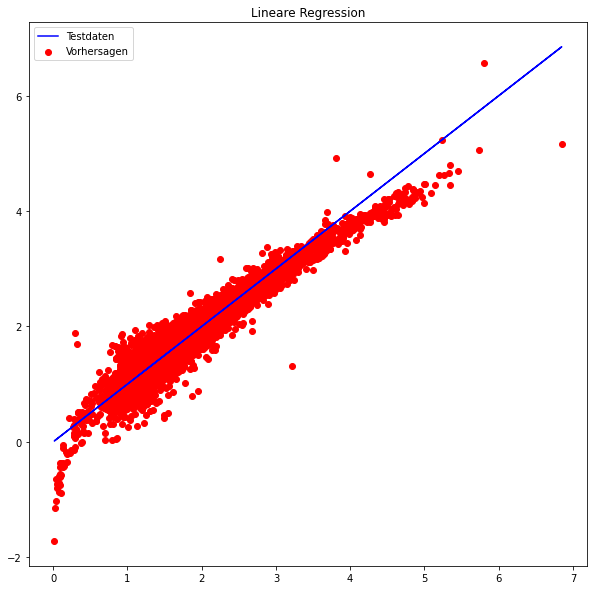

In [57]:
#visualisierung
y_pred=baseline_model.predict(X_test_preprocessed)

plt.figure(figsize=(10,10))
plt.plot(y_test, y_test, color = 'blue', label="Testdaten")                
plt.scatter(y_test, y_pred, color = 'red', label= "Vorhersagen")     
plt.title("Lineare Regression")
plt.legend()
plt.show()

<b>4.1.2 L1 Regularisierung</b>

In [58]:
#scoring
modelle_eval.append("L1 Reg")
scorings_eval.append(reg.score(X_test_preprocessed, y_test))

reg.score(X_test_preprocessed, y_test)

0.8171163356645885

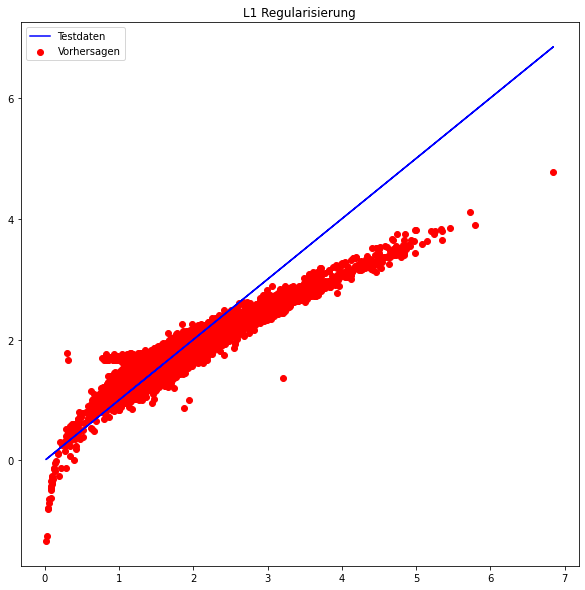

In [59]:
#visualisierung
y_pred=reg.predict(X_test_preprocessed)

plt.figure(figsize=(10,10))
plt.plot(y_test, y_test, color = 'blue',label="Testdaten")                
plt.scatter(y_test, y_pred, color = 'red',label="Vorhersagen")     
plt.title("L1 Regularisierung")
plt.legend()
plt.show()

<b> 4.1.3 Gradient Boosting </b>

In [60]:
#scoring
modelle_eval.append("Grad Boosting")
scorings_eval.append(boosting.score(X_test_preprocessed, y_test))

boosting.score(X_test_preprocessed, y_test)

0.969708868747074

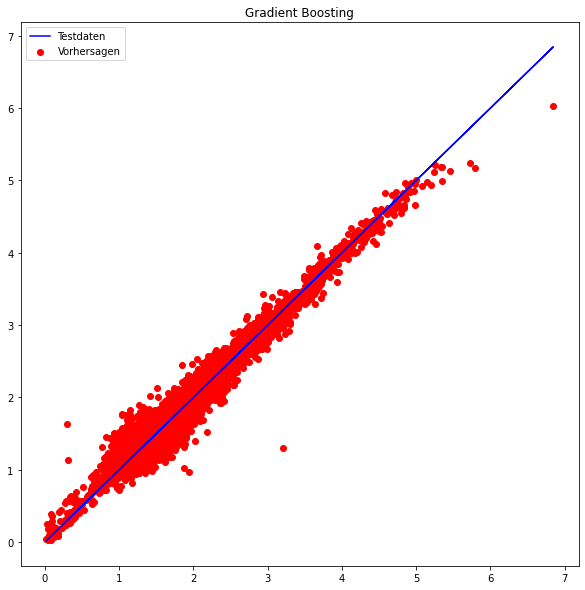

In [61]:
#Visualisierung
y_pred=boosting.predict(X_test_preprocessed)

plt.figure(figsize=(10,10))
plt.plot(y_test, y_test, color = 'blue', label="Testdaten")                
plt.scatter(y_test, y_pred, color = 'red', label="Vorhersagen")     
plt.title("Gradient Boosting")
plt.legend()
plt.show()

<b> 4.1.4 L2 Regularisierung</b>

In [62]:
#scoring
modelle_eval.append("L2 Reg")
scorings_eval.append(boosting.score(X_test_preprocessed, y_test))

reg2.score(X_test_preprocessed, y_test)

0.9294523423164616

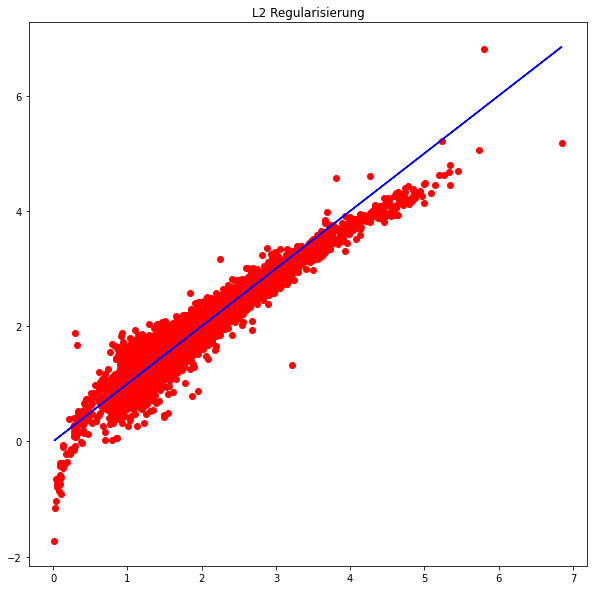

In [63]:
#visualisierung
y_pred=reg2.predict(X_test_preprocessed)
plt.figure(figsize=(10,10))
plt.plot(y_test, y_test, color = 'blue')                
plt.scatter(y_test, y_pred, color = 'red')   
plt.title("L2 Regularisierung")
plt.show()


<b>4.1.5 L2 tuned Model</b>

In [64]:
#Scoring
modelle_eval.append("L2 tuned Model")
scorings_eval.append(reg2_tuned.score(X_test_preprocessed, y_test))

reg2_tuned.score(X_test_preprocessed, y_test)

0.9292615850944085

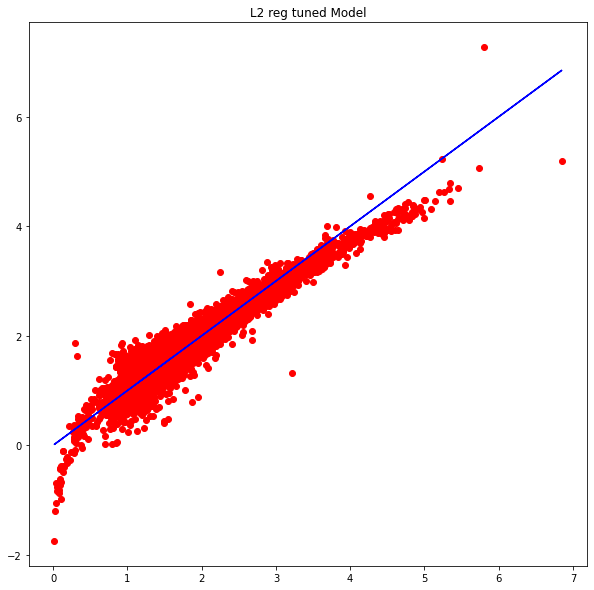

In [65]:
#Visualisierung
y_pred=reg2_tuned.predict(X_test_preprocessed)
plt.figure(figsize=(10,10))
plt.plot(y_test, y_test, color = 'blue')                
plt.scatter(y_test, y_pred, color = 'red') 
plt.title("L2 reg tuned Model")
plt.show()

<b>4.1.6 KNN Regression Model</b>

In [66]:
#Scoring
modelle_eval.append("KNN Reg")
scorings_eval.append(neigh.score(X_test_preprocessed, y_test))

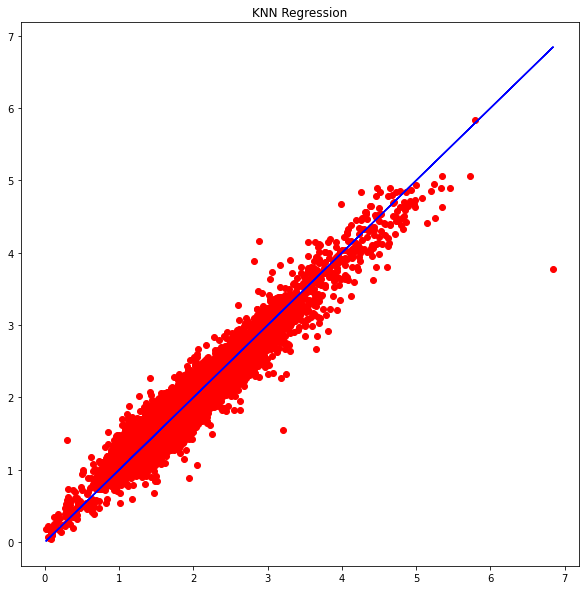

In [67]:
#Visualisierung
y_pred=neigh.predict(X_test_preprocessed)
plt.figure(figsize=(10,10))
plt.plot(y_test, y_test, color = 'blue')                
plt.scatter(y_test, y_pred, color = 'red')   
plt.title("KNN Regression")
plt.show()

### Visualisierung und Vergleich der verwendeten Modelle

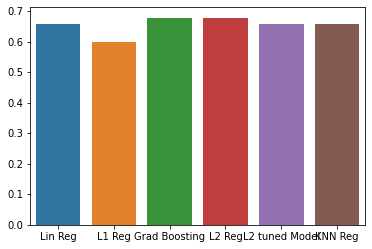

In [68]:
sns.barplot(modelle_eval,(np.log1p(np.array(scorings_eval))))

In [69]:
#Ausgabe der Scorings
for i in range(len(modelle_eval)): 
    print(modelle_eval[i]," : ",scorings_eval[i])

Lin Reg  :  0.9294508187802968
L1 Reg  :  0.8171163356645885
Grad Boosting  :  0.969708868747074
L2 Reg  :  0.969708868747074
L2 tuned Model  :  0.9292615850944085
KNN Reg  :  0.9316349768105509


<b> Zum Vergleich: Scorings der Trainingsdaten </b>

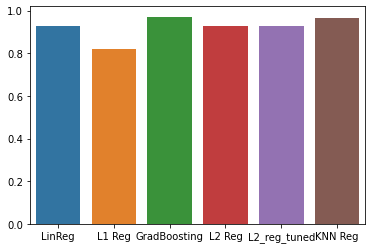

In [70]:
sns.barplot(modelle,scorings)

In [71]:
#Ausgabe der Scorings
for i in range(len(modelle)): 
    print(modelle[i]," : ",scorings[i])

LinReg  :  0.9300162481125692
L1 Reg  :  0.8186276332474796
GradBoosting  :  0.9709890368773009
L2 Reg  :  0.929983015273746
L2_reg_tuned  :  0.9297297242277243
KNN Reg  :  0.9658156053826701


### 4.2 Die fehlenden Diameter vorhersagen

<b>Der Datensatz mit der fehlenden Zielvariable ("dropped_df") muss zunächst vorverarbeitet werden. Dazu wenden wir alle zuvor definierten Preprocessing Schritte an.</b>  

### 4.2.1 Preprocessing

1. Die Spalte der Zielvariable entfernen

In [72]:
dropped_df= dropped_df.drop('diameter', axis=1)

dropped_df.shape

(702079, 30)

2. Diejenigen Spalten entfernen, die weniger als 50% mit Daten gefüllt sind 

In [73]:
clmns_to_drop = dropped_df.columns[dropped_df.isnull().sum()/dropped_df.shape[0] > 0.5]

dropped_df = dropped_df.drop(clmns_to_drop,axis=1)

In [74]:
dropped_df.shape

(702079, 19)

3. Für eine bessere Lesbarkeit bennenen wir dropped_df in "X_pred" um

In [75]:
X_pred=dropped_df

4. Transformieren der Daten in den kategorischen Spalten zum kategorischen Datentyp

In [76]:
X_pred.loc[:, categ_columns] =df.loc[:, categ_columns].astype("category")

5. Imputation der Missing Values sowie anschließende Transformation

In [77]:
#1. Imputen
X_pred_contin=X_pred.reindex(columns = continuous_columns)
X_pred_categ= X_pred.loc[:,categ_columns]

#2. Transformation: Missing Values werden entsprechend gefüllt 
X_pred_contin_imputed=continuous_imputer.transform(X_pred_contin)
X_pred_categ_imputed=category_imputer.transform(X_pred_categ)



6. Encoding 

In [78]:
cat_encoder = OneHotEncoder(categories=nominal_categories_train,sparse=False)
cat_encoder.fit(X_pred_categ_imputed)

X_pred_categ_imputed_encoded = cat_encoder.transform(X_pred_categ_imputed)


7. Skalierung

In [79]:
X_pred_contin_imputed_scaled = scaler.transform(X_pred_contin_imputed)

8. Concatenation

In [80]:
X_pred_preprocessed = np.concatenate((
    X_pred_categ_imputed_encoded,
    X_pred_contin_imputed_scaled
), axis=1)


### 4.2.2 Vorhersage (Wir nehmen unser "bestes" Modell: Gradient Boosting)

In [81]:
y_hat=boosting.predict(X_pred_preprocessed)

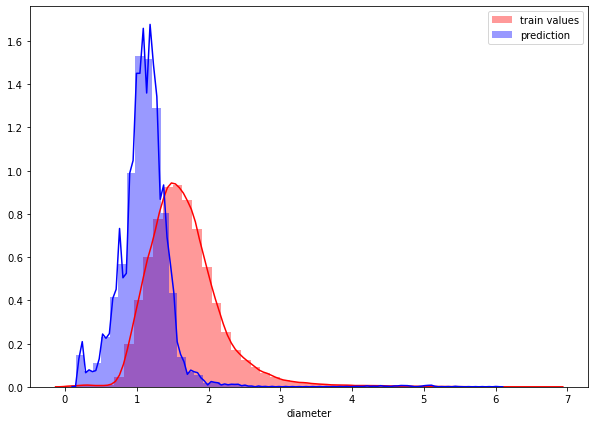

In [82]:
plt.figure(figsize=(10, 7))
sns.distplot(y_train,label='train values', color='red')
sns.distplot(y_hat ,label='prediction', color='blue')
plt.legend()
plt.show()



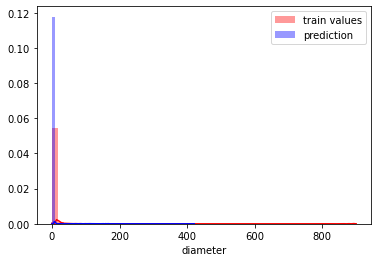

In [83]:
y_hat_orig=np.expm1(y_hat)
y_train_orig=np.expm1(y_train)

sns.distplot(y_train_orig,label='train values', color='red')
sns.distplot(y_hat_orig ,label='prediction', color='blue')
plt.legend()
plt.show()
